Ex-3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [5]:
data = pd.read_csv('csv_files/suv_data.csv')

In [7]:
features = data[['Age', 'EstimatedSalary']]
target = data['Purchased']

In [9]:
X = features
y = target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [19]:
f1_score_tr = f1_score(y_train, y_pred_train)
f1_score_te = f1_score(y_test, y_pred_test)

In [21]:
accuracy = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

In [23]:
h = .02

In [25]:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

In [27]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

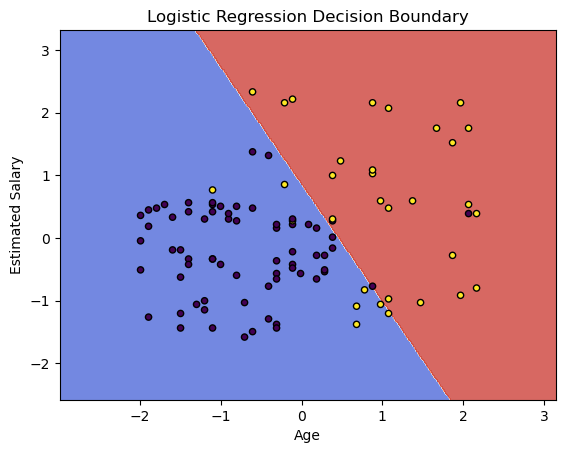

In [75]:
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=20)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [35]:
print("F1 Score (Training):", f1_score_tr)
print("F1 Score (Testing):", f1_score_te)

F1 Score (Training): 0.7389162561576355
F1 Score (Testing): 0.8135593220338984


In [43]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.89

Confusion Matrix:
 [[65  3]
 [ 8 24]]


In [45]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

